<a href="https://colab.research.google.com/github/SnehilRajeev96/Financial_Evaluation/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-220290611.py:105: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = df_pivot.replace(mapping)


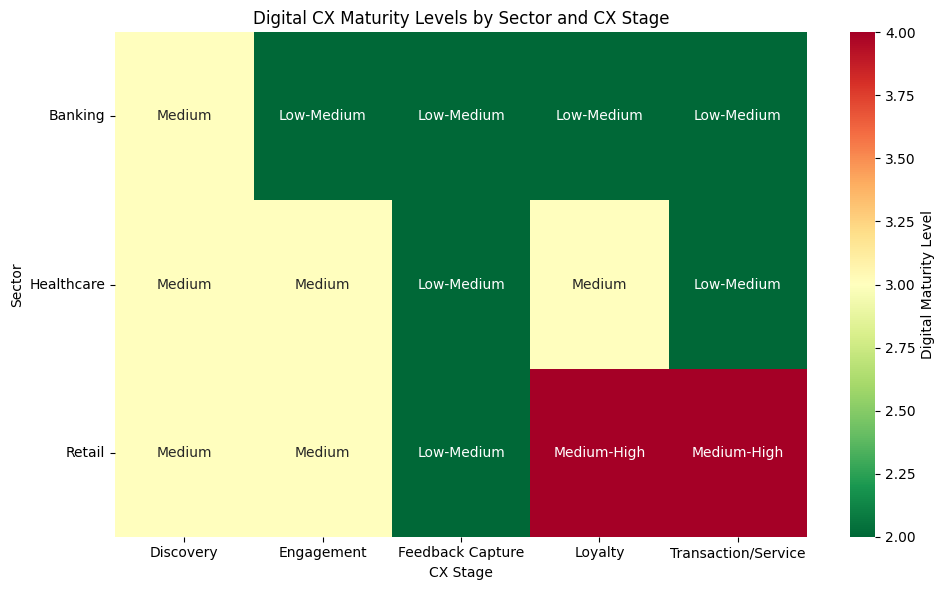

In [1]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulated expert transcripts for each sector and CX stage
transcripts = {
    'Banking': {
        'Discovery': [
            "Expert A (Head of Digital Banking): Our mobile app’s onboarding campaign uses targeted social media ads and personalized email invitations, which helps new customers discover our digital services efficiently.",
            "Expert B (Digital Marketing Lead): We invest in SEO and partnerships with fintech aggregators so banking customers can easily find our discovery portal online and explore account options."
        ],
        'Engagement': [
            "Expert A: We leverage in-app messaging, push notifications, and AI-driven chatbots to engage customers with personalized financial advice and product recommendations.",
            "Expert B: Our omnichannel CRM integrates email, SMS, and push notifications, creating a seamless engagement experience and tracking customer interactions across channels."
        ],
        'Transaction/Service': [
            "Expert A: Our digital platform supports end-to-end service—from instant fund transfers to remote loan applications—ensuring high availability and minimal friction during transactions.",
            "Expert B: We implemented biometric authentication and real-time fraud detection mechanisms that streamline service delivery while maintaining security."
        ],
        'Feedback Capture': [
            "Expert A: We use automated post-transaction surveys and AI-driven sentiment analysis on customer chat transcripts to capture feedback promptly.",
            "Expert B: Our digital concierge bot proactively asks customers for feedback at key touchpoints, feeding insights back into our CX improvement loop."
        ],
        'Loyalty': [
            "Expert A: We offer tiered rewards through our digital wallet, linking loyalty points to personalized offers and travel benefits in our partner ecosystem.",
            "Expert B: Our loyalty program integrates with the mobile banking app, delivering targeted cashback and exclusive experiences that keep customers returning."
        ],
    },
    'Healthcare': {
        'Discovery': [
            "Expert C (Head of Digital Patient Acquisition): We collaborate with health content platforms and run SEO-optimized blogs to help patients discover telehealth options easily.",
            "Expert D (Digital Outreach Manager): Our partnerships with insurance providers and online health directories drive traffic to our patient portal discovery page."
        ],
        'Engagement': [
            "Expert C: We send appointment reminders, personalized wellness tips, and interactive health content through our mobile app to keep patients engaged.",
            "Expert D: Our patient portal includes chat-based follow-ups and educational videos tailored to patient profiles, boosting continuous engagement."
        ],
        'Transaction/Service': [
            "Expert C: We provide online appointment booking, e-prescriptions, and digital billing, allowing patients to complete healthcare transactions seamlessly.",
            "Expert D: Our telemedicine platform supports video consultations, real-time lab results access, and remote monitoring services for convenience."
        ],
        'Feedback Capture': [
            "Expert C: We deploy satisfaction surveys after each consultation and monitor social media sentiment to gather comprehensive patient feedback.",
            "Expert D: Our digital kiosks in clinics and post-visit SMS surveys ensure timely feedback capture across physical and virtual channels."
        ],
        'Loyalty': [
            "Expert C: We offer wellness membership programs with digital health trackers and exclusive content to foster long-term patient loyalty.",
            "Expert D: Our chronic care programs include rewards for healthy habits, encouraging patients to stay connected with our services."
        ],
    },
    'Retail': {
        'Discovery': [
            "Expert E (E-commerce Director): We optimize product listings, leverage influencer partnerships, and use dynamic search ads so customers can discover products easily online.",
            "Expert F (Digital Acquisition Lead): Our AR-enabled social ads and shoppable videos drive high discovery rates among target segments."
        ],
        'Engagement': [
            "Expert E: We implement personalized product recommendations, live chat support, and loyalty notifications to maintain high engagement on our retail platform.",
            "Expert F: Through our mobile app’s push campaigns and tailored email newsletters, we re-engage customers with curated deals and content."
        ],
        'Transaction/Service': [
            "Expert E: Our checkout process integrates one-click payments, flexible payment options, and fast delivery scheduling, enhancing transaction efficiency.",
            "Expert F: We use AI-based fraud detection and real-time inventory updates to ensure smooth transaction flows and accurate order fulfillment."
        ],
        'Feedback Capture': [
            "Expert E: Post-purchase feedback widgets and NPS surveys embedded in our order confirmation emails capture valuable customer insights.",
            "Expert F: We analyze product reviews and social mentions through sentiment analysis, feeding data into our continuous improvement cycle."
        ],
        'Loyalty': [
            "Expert E: Our tiered points program, linked to exclusive product launches and early access events, builds strong customer loyalty.",
            "Expert F: We leverage gamification and mobile wallet integration to reward repeat purchases and referrals effectively."
        ],
    }
}

# 2. Run sentiment analysis and map to maturity levels
results = []
for sector, stages in transcripts.items():
    for stage, answers in stages.items():
        merged = " ".join(answers)
        polarity = TextBlob(merged).sentiment.polarity
        if polarity > 0.5:
            level = "High"
        elif polarity > 0.3:
            level = "Medium-High"
        elif polarity > 0.1:
            level = "Medium"
        elif polarity > -0.1:
            level = "Low-Medium"
        else:
            level = "Low"
        results.append({
            "Sector": sector,
            "Stage": stage,
            "Polarity": round(polarity, 3),
            "Maturity": level
        })

# 3. Build a DataFrame and pivot for plotting
df = pd.DataFrame(results)
df_pivot = df.pivot(index="Sector", columns="Stage", values="Maturity")

# 4. Convert maturity levels to numeric for heatmap coloring
mapping = {"Low": 1, "Low-Medium": 2, "Medium": 3, "Medium-High": 4, "High": 5}
heatmap_data = df_pivot.replace(mapping)

# 5. Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=df_pivot,
    fmt='',
    cmap='RdYlGn_r',
    cbar_kws={'label': 'Digital Maturity Level'}
)
plt.title('Digital CX Maturity Levels by Sector and CX Stage')
plt.xlabel('CX Stage')
plt.ylabel('Sector')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
